In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from imblearn.combine import *
from imblearn.ensemble import EasyEnsemble
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


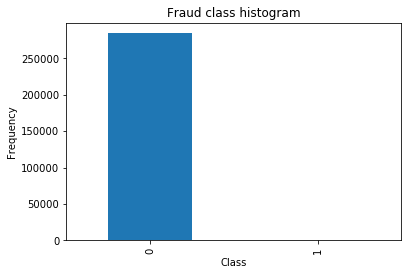

In [3]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

> The dataset is highly imbalanced

# Scaling 'Amount' variable

In [44]:
df['scaledAmount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
scaled_df = df.copy()
scaled_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaledAmount
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350150
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254116
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313248
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,0.514354


# Dropping 'Time' and 'Amount' which are not needed

In [57]:
preproceesed_df = scaled_df.drop(['Time', 'Amount'], axis = 1)
preproceesed_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaledAmount
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350150
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254116
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313248
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,0.514354


In [38]:
X, y = preproceesed_df.drop("Class", axis = 1), preproceesed_df.Class

# Creating the Training and Test Sets

In [39]:
training_features, test_features, training_target, test_target = train_test_split(X, y, test_size = .3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(training_features, training_target,test_size = .3, random_state=0)


# Oversampling

In [37]:
sm = SMOTE(random_state=0, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=0)
clf_rf.fit(X_train_res, y_train_res)

print('Validation Results')
print(clf_rf.score(X_val, y_val))
print(recall_score(y_val, clf_rf.predict(X_val)))
print('\nTest Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))

/home/snu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Validation Results
0.999515131249
0.814159292035

Test Results
0.999531851644
0.768707482993


# Undersampling

In [47]:
enn = EditedNearestNeighbours(random_state=0, ratio = 1.0)
X_train_res, y_train_res = enn.fit_sample(X_train, y_train)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=0)
clf_rf.fit(X_train_res, y_train_res)

print('Validation Results')
print(clf_rf.score(X_val, y_val))
print(recall_score(y_val, clf_rf.predict(X_val)))
print('\nTest Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))

/home/snu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Validation Results
0.999414813576
0.796460176991

Test Results
0.999414814555
0.768707482993


# Combination

In [55]:
smenn = SMOTEENN(random_state=0, ratio = 1.0)
X_train_res, y_train_res = smenn.fit_sample(X_train, y_train)
clf_rf = RandomForestClassifier(n_estimators=25, random_state=0)
clf_rf.fit(X_train_res, y_train_res)

print('Validation Results')
print(clf_rf.score(X_val, y_val))
print(recall_score(y_val, clf_rf.predict(X_val)))
print('\nTest Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))

/home/snu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Validation Results
0.99936465474
0.814159292035

Test Results
0.999438221973
0.78231292517


# Ensemble (to be continue...)